In [2]:
import os
from src.clean import DataClean
from src.visual import DataVisual
from src.constants import GrpColumns
import numpy as np
from src.selector import high_correlated_cols
from scipy import stats

In [3]:
# initialize the data cleaning object
data_path = "data"
filename = os.path.join(data_path, "csv", "mlsgrid_properties_202406231225.csv")
dc = DataClean(file=filename)
v = DataVisual()

/Users/james/Documents/Projects/RealEstate_Fall2023/src/clean.py:47: DtypeWarning: Columns (1,2,5,9,11,13,14,15,16,17,18,19,25,26,28,29,30,32,34,35,36,37,38,39,40,45,47,48,49,50,51,58,59,60,61,62,63,64,65,74,75,79,80,81,83,84,85,87,88,89,91,92,93,95,97,99,100,102,103,104,105,112,120,123,124,126,135,137,138,139,143,144,145,147,148,149,152,153,156,183,184,185,186,187,188,191,195,196,197,198,199,200,201,202,203,205,206,207,208,209,210,211,212,213,214,216,220,222,224,225,227,233,237,238,241,242,246,249,251,256,258,260,262,263,264,265,268,269,271,272,273,274,275,278,279,280,281,282,283,285,286,287,290,292,293,299,302,303,305,312,319,321,326,328,330,331,340,341,343,344,345,346,350,357,359,364,368,369,373,375,376,377,379,381,382,385,386,387,393,394,395,399,403,404) have mixed types. Specify dtype option on import or set low_memory=False.
  self.__dataframe = pd.read_csv(


In [5]:
"list_price" in dc.dataframe.columns

True

In [6]:
dc.dataframe.head()

,id,above_grade_finished_area_source,above_grade_finished_area_units,above_grade_finished_area,accessibility_features,additional_parcels_description,additional_parcels_yn,appliances,architectural_style,association_fee_frequency,...,window_features,withdrawn_date,wooded_area,year_built_source,year_built,zoning_description,zoning,inserted_at,updated_at,listing_id
0,bac2783a-1f65-41fb-bf36-4177aaa12b33,NaN,NaN,1555.0,{},NaN,NaN,"{""Electric Oven"",""Electric Range"",""Electric Wa...",{Transitional},NaN,...,"{""Storm Window(s)""}",NaN,NaN,NaN,1963.0,NaN,NaN,2024-05-05 21:16:45.000,2024-05-05 21:16:45.000,28e12caa-3eb7-4a82-b35c-66b487161396
1,a76aa135-a70c-43fe-996f-d6ef3e4f31e9,NaN,NaN,NaN,{},NaN,NaN,"{Dishwasher,Disposal,""Electric Oven"",""Electric...",{Transitional},Quarterly,...,"{""Insulated Window(s)""}",NaN,NaN,NaN,2006.0,NaN,NaN,2024-05-05 21:16:45.000,2024-05-05 21:16:45.000,0af3f25b-8e83-457b-a5cf-20c7afdf8baf
2,1f819f10-0b90-4d98-b76e-dc7434b3708a,NaN,NaN,2400.0,{},NaN,NaN,"{Dishwasher,""Gas Water Heater"",Microwave}",{Transitional},NaN,...,"{""Insulated Window(s)""}",NaN,NaN,NaN,2003.0,NaN,NaN,2024-05-05 21:16:45.000,2024-05-05 21:16:45.000,6a387472-3112-4685-90e9-1f75906cd1e6
3,debf8d2e-0804-44e9-bb63-c326e9ea07af,NaN,NaN,820.0,{},NaN,NaN,"{""Convection Oven"",Dishwasher,Disposal,""Electr...",{Traditional},NaN,...,"{""Insulated Window(s)""}",NaN,NaN,NaN,2003.0,NaN,NaN,2024-05-05 21:16:45.000,2024-05-05 21:16:45.000,865d9972-3c7c-4bbc-a3f1-0f08c9fd86ab
4,ce278a5c-834d-4fe8-adde-777170a4984c,NaN,NaN,1510.0,{},NaN,NaN,"{Dishwasher,Disposal,""Double Oven"",""Electric O...",{Cottage},NaN,...,"{""Insulated Window(s)""}",NaN,NaN,NaN,1938.0,NaN,NaN,2024-05-05 21:16:45.000,2024-05-05 21:16:45.000,e2585594-8cbc-4485-9467-8dcc82adfb08


## 1. Explore the target feature

In [ ]:
v.three_chart_plot(dc.dataframe, dc.y)

In [ ]:
from scipy.stats import skew

print(
    "Skewness of the list price is",
    dc.dataframe["list_price"].skew(),
    skew(dc.dataframe["list_price"]),
)

In [4]:
dc.nplog_y()

In [ ]:
v.three_chart_plot(dc.dataframe, "list_price")
# dc.drop_cols(cols=["list_price"])

Check target skew

## 2. Display Missing Value Percentage

In [ ]:
v.show_miss_percent(data=dc.dataframe, thresh=80)

## 3. Update nan value

### replace all "{}", "{None}", "", "N/A" to np.nan and drop dirty rows

In [5]:
dc.replace_empty_brackets()

dc.drop_dirty_rows()

/Users/james/Documents/Projects/RealEstate_Fall2023/src/clean.py:190: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.dataframe.replace(


In [15]:
dc.dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533214 entries, 0 to 2533213
Columns: 390 entries, id to listing_id
dtypes: bool(12), float64(120), int64(1), object(257)
memory usage: 7.2+ GB


### remove 100% missing values

In [6]:
# dc.drop_cols(GrpColumns.ZERO_COLS)
if set(GrpColumns.ZERO_COLS).issubset(set(dc.dataframe.columns)):
    dc.dataframe.drop(columns=list(set(GrpColumns.ZERO_COLS)), axis=1, inplace=True)
else:
    rm_cols = set(GrpColumns.ZERO_COLS) & set(dc.dataframe.columns)
    dc.dataframe.drop(columns=list(rm_cols), axis=1, inplace=True)

### 3.1 Update associated_yn

In [7]:
association_fields = [
            "association_fee_frequency",
            "association_fee",
            "association_fee2_frequency",
            "association_fee2",
            "association_name",
            "association_name2",
            "association_phone",
            "association_phone2",
        ]
dc.update_association_yn(
    fields=association_fields,
    target_col="association_yn",
)
dc.dataframe["association_yn"].isna().sum()

0

### 3.2. Update Basement_yn

In [8]:
dc.update_dependant_yn(depends="basement", target="basement_yn")

### 3.3 Update fireplace_yn

In [9]:
dc.update_dependant_yn(
    depends="fireplace_features",
    target="fireplace_yn",
)

### 3.4 Update Boolean Features: fill na and convert dtype

In [10]:
dc.update_binary_cols(cols=GrpColumns.BOOL_COLS)

/Users/james/Documents/Projects/RealEstate_Fall2023/src/clean.py:367: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .fillna(False)
/Users/james/Documents/Projects/RealEstate_Fall2023/src/clean.py:367: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .fillna(False)
/Users/james/Documents/Projects/RealEstate_Fall2023/src/clean.py:367: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('fu

for col new_construction_yn fill na median 1.0
for col open_parking_yn fill na median 1.0
for col senior_community_yn fill na median 1.0


In [11]:
dc.dataframe[
    GrpColumns.BOOL_COLS["false"] + GrpColumns.BOOL_COLS["freq"] + GrpColumns.BOOL_COLS["other"]
].isna().sum()

car__land_included_yn            0
car__main_level_garage_yn        0
car__down_payment_resource_yn    0
carport_yn                       0
garage_yn                        0
new_construction_yn              0
open_parking_yn                  0
senior_community_yn              0
fireplace_yn                     0
association_yn                   0
basement_yn                      0
dtype: int64

In [12]:
dc.remove_missing()

Feature id >> Missing entries: 0 |  Percentage: 0.0 | Unique values: 2533214
Feature above_grade_finished_area >> Missing entries: 680938 |  Percentage: 26.88 | Unique values: 8605
Feature accessibility_features >> Missing entries: 2455553 |  Percentage: 96.93 | Unique values: 4723
Feature additional_parcels_description >> Missing entries: 2514114 |  Percentage: 99.25 | Unique values: 12458
Feature appliances >> Missing entries: 479294 |  Percentage: 18.92 | Unique values: 117881
Feature architectural_style >> Missing entries: 1234501 |  Percentage: 48.73 | Unique values: 1146
Feature association_fee_frequency >> Missing entries: 1725332 |  Percentage: 68.11 | Unique values: 6
[nan 'Quarterly' 'Monthly' 'Annually' 'Semi-Annually' 'Triannual']
Feature association_fee >> Missing entries: 1501724 |  Percentage: 59.28 | Unique values: 11716
Feature association_fee2_frequency >> Missing entries: 2519889 |  Percentage: 99.47 | Unique values: 5
[nan 'Annually' 'Monthly' 'Quarterly' 'Semi-Annu

### 3.5 Update Int Features: fill na and convert dtype

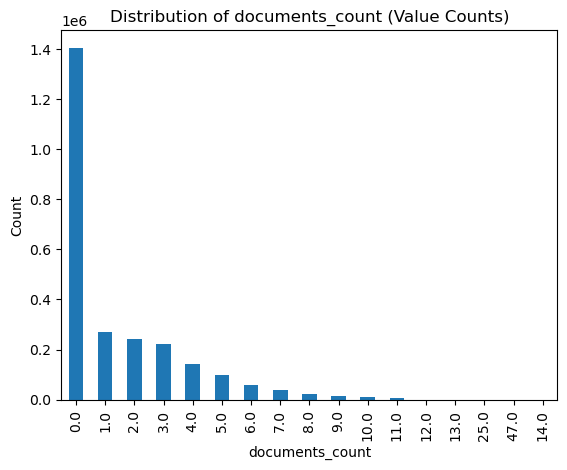

In [18]:
v.bar_chart(dataframe=dc.dataframe, cols=["documents_count"])

In [13]:
# tmp fillin "documents_count",  # 1
dc.dataframe[["documents_count"]].fillna(0, inplace=True)

/var/folders/kz/znfcv6cx2_13gb4tm1mmgdd00000gn/T/ipykernel_89061/816261924.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc.dataframe[["documents_count"]].fillna(0, inplace=True)


In [14]:
dc.update_int_cols(cols=GrpColumns.INT_COLS)

for col year_built fill na freq 2006
for col bathrooms_full fill na freq 2
for col bathrooms_half fill na freq 0
for col bathrooms_total_integer fill na freq 3
for col bedrooms_total fill na freq 3
for col documents_count fill na freq 0


In [15]:
dc.dataframe[
    GrpColumns.INT_COLS["median"]
    + GrpColumns.INT_COLS["freq"]
    + GrpColumns.INT_COLS["zero"]
    + GrpColumns.INT_COLS["other"]
].isna().sum()

year_built                             0
bathrooms_full                         0
bathrooms_half                         0
bathrooms_total_integer                0
bedrooms_total                         0
documents_count                        0
car__bedroom_basement                  0
car__bedroom_lower                     0
car__bedroom_main                      0
car__bedroom_second_lq                 0
car__bedroom_third                     0
car__bedroom_upper                     0
car__green_verification_count          0
car__full_bath_basement                0
car__full_bath_lower                   0
car__full_bath_main                    0
car__full_bath_second_lq               0
car__full_bath_third                   0
car__full_bath_upper                   0
car__half_bath_basement                0
car__half_bath_lower                   0
car__half_bath_main                    0
car__half_bath_second_lq               0
car__half_bath_third                   0
car__half_bath_u

### 3.6 Update Float columns: fill na and convert dtype

In [16]:
dc.update_num_cols(cols=GrpColumns.FLOAT_COLS)

for col above_grade_finished_area fill na median 1780.0
for col below_grade_finished_area fill na median 0.0
for col living_area fill na median 1824.0
for col lot_size_area fill na median 0.4
for col original_list_price fill na median 189900.0
for col tax_assessed_value fill na median 133900.0


In [17]:
dc.dataframe[
    GrpColumns.FLOAT_COLS["median"]
    + GrpColumns.FLOAT_COLS["zero"]
    + GrpColumns.FLOAT_COLS["other"]
].isna().sum()

above_grade_finished_area                               0
below_grade_finished_area                               0
living_area                                             0
lot_size_area                                           0
original_list_price                                     0
tax_assessed_value                                      0
car__association_annual_expense                         0
car__acres_cleared                                      0
car__admin_fee                                          0
car__application_fee                                    0
car__sq_ft_unheated_basement                            0
car__sq_ft_unheated_lower                               0
car__sq_ft_unheated_main                                0
car__sq_ft_unheated_third                               0
car__sq_ft_unheated_total                               0
car__sq_ft_unheated_upper                               0
car__sq_ft_garage                                       0
car__sq_ft_low

### 3.7 Update str columns: fill na and convert dtype

In [18]:
dc.update_str_cols(cols=GrpColumns.STR_COLS)

for col car__entry_location_mls fill na freq Main
for col car__zoning_specification fill na freq RES
for col county_or_parish fill na freq Mecklenburg
for col levels fill na freq {Two}
for col state_or_province fill na freq NC
for col property_type fill na freq Residential
for col property_sub_type fill na freq Single Family Residence
for col street_name fill na freq Main


In [19]:
dc.dataframe[
    GrpColumns.STR_COLS["freq"]
    + GrpColumns.STR_COLS["Unspecified"]
    + GrpColumns.STR_COLS["None"]
    + GrpColumns.STR_COLS["other"]
].isna().sum()

car__entry_location_mls      0
car__zoning_specification    0
county_or_parish             0
levels                       0
state_or_province            0
property_type                0
property_sub_type            0
street_name                  0
elementary_school            0
high_school                  0
middle_or_junior_school      0
car_hoa_subject_to           0
city                         0
postal_code                  0
dtype: int64

### 3.8 Update Multiple Option Features: BinaryEncoding

In [20]:
dc.mlb_transform_cols(cols=GrpColumns.ENGINEER_COLS)

In [21]:
dc.dataframe.isnull().sum()

id                                        0
above_grade_finished_area                 0
additional_parcels_description      2514114
association_fee_frequency           1725332
association_fee                     1501724
                                     ...   
window_features_insulatedwindows          0
window_features_skylights                 0
window_features_stormwindows              0
window_features_windowtreatments          0
window_features_nan                       0
Length: 871, dtype: int64

### 3.9 update date columns

In [22]:
dc.extract_date(cols=GrpColumns.DATE_COLS)

/Users/james/Documents/Projects/RealEstate_Fall2023/src/clean.py:546: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.__dataframe[col].fillna(


for col listing_contract_date fill na freq 2024-05-17 00:00:00


/Users/james/Documents/Projects/RealEstate_Fall2023/src/clean.py:546: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.__dataframe[col].fillna(


for col original_entry_timestamp fill na freq 2007-09-06 04:00:00


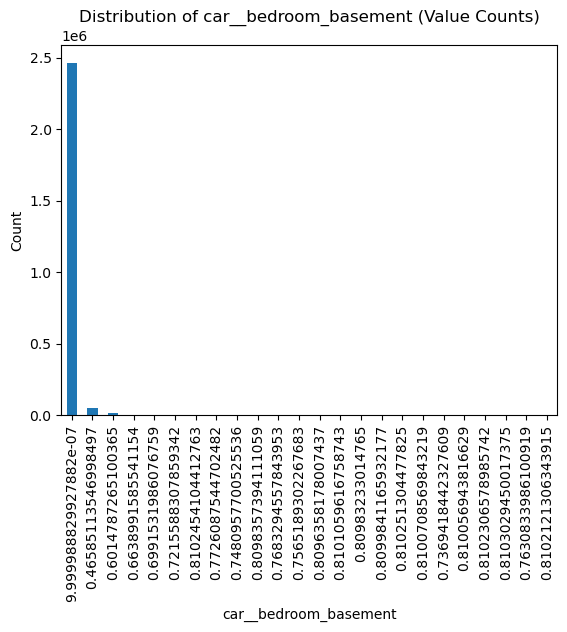

In [31]:
v.bar_chart(dc.dataframe, cols=["car__bedroom_basement"])

In [ ]:
dc.dataframe[dc.dataframe["car__bedroom_basement"]==382].id

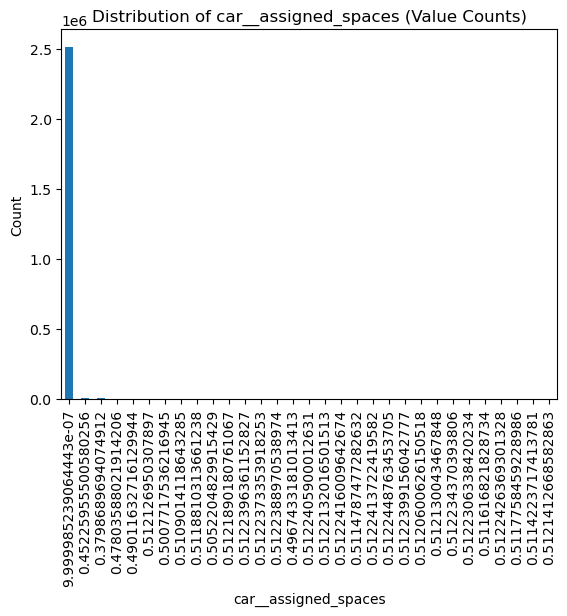

In [32]:
v.bar_chart(dc.dataframe, cols=["car__assigned_spaces"])

In [ ]:
dc.dataframe[dc.dataframe["car__assigned_spaces"] == 40].id

In [ ]:
v.bar_chart(dc.dataframe, cols=["bedrooms_total"])

In [ ]:
dc.dataframe[dc.dataframe["bedrooms_total"].isin([2523, 1115, 2178, 1867, 1550])].id

In [ ]:
dc.dataframe["documents_count"].dtypes

In [ ]:
v.bar_chart(dc.dataframe, cols=["documents_count"])

### 3.10 update skewed columns

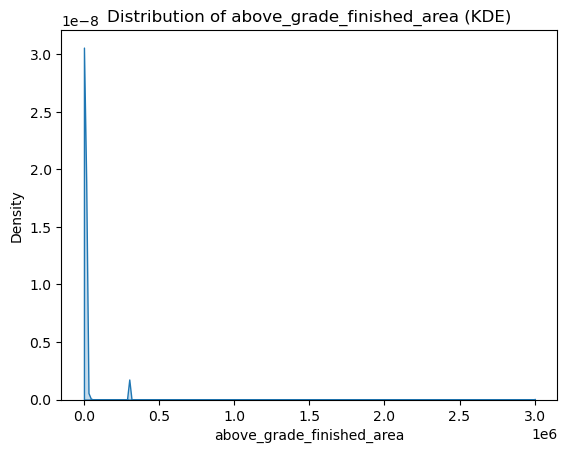

In [25]:
v.value_dist(dc.dataframe, cols=["above_grade_finished_area"])

In [30]:
dc.dataframe[dc.dataframe["above_grade_finished_area"] <=0]

,id,above_grade_finished_area,additional_parcels_description,association_fee_frequency,association_fee,association_fee2_frequency,association_fee2,association_name,association_name2,association_phone,...,window_features_windowtreatments,window_features_nan,listing_contract_date_year,listing_contract_date_month,listing_contract_date_day,original_entry_timestamp_year,original_entry_timestamp_month,original_entry_timestamp_day,months_between_list,months_till_today
2195727,2f9a12ad-1006-4726-9e1c-c7c69c54031c,-125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,2024,2,3,2024,2,3,0,5


In [62]:
# dc.dataframe[dc.dataframe["above_grade_finished_area"] <= 0].loc[
#     2195727, "above_grade_finished_area"
# ] = 0
dc.dataframe.loc[
    2195727, "above_grade_finished_area"
] = 0

In [64]:
dc.update_skewed()

Column above_grade_finished_area contains non-positive values. Adding a small const. [ 1555.  1780.  2400. ... 21920. 22767.  7484.]
Column car__sq_ft_main contains non-positive values. Adding a small const. [ 1555.     0.  1200. ...  4423.  5397. 19975.]
Column car__bedroom_upper contains non-positive values. Adding a small const. [   0    4    3    2    1    5    8    6    7    9   42   22   31   32
   33   10   23   12   43  956   24   11   44  973  800   52  942  736
  572  924   40  810 1252]
Column car__bedroom_main contains non-positive values. Adding a small const. [   3    0    2    1    4    5    6    7    8   12   31    9   23   22
   33   11   32   30   21   43   26  682   42   10   34  333   13   14
 1867  764 2052   37   90   36   51 1104 1160  976  627 1143  850 1400
   16  717 2012 1240 2060 1033 2622  790  820 1262  300  572 1244 1056
 1505  150   20 1456   44 1028 1536  463 1598 1557  800   40 2658 3240
 1115  847 1549]
Column car__sq_ft_unheated_upper contains non-po

## 4. Remove Irrelevant features

In [65]:
remove_list = list(set(GrpColumns.IRRELEVANT_COLS).union(set(GrpColumns.REMOVE_COLS)) - set(dc.removed_cols))
dc.drop_cols(cols=remove_list)

## 5. Remove all features that have 100% missing data

In [ ]:
# dc.conv_category_cols(GrpColumns.ENGINEER_COLS)
# dc.remove_missing(miss_perc=100)


## 6 Encoding features

### 6.1 One Hot Encoding for GrpColumns.OH_ENC

In [66]:
dc.one_hot_enc(GrpColumns.OH_ENC)

In [69]:
dc.dataframe["state_or_province_SC"]

0          False
1           True
2          False
3          False
4          False
           ...  
2533209    False
2533210    False
2533211    False
2533212     True
2533213    False
Name: state_or_province_SC, Length: 2533214, dtype: bool

### 6.2 Label Encoding for GrpColumns.LABEL_ENC

In [67]:
dc.label_enc(GrpColumns.LABEL_ENC)

In [68]:
dc.dataframe["levels_enc"]

0           9
1          13
2          13
3          11
4           9
           ..
2533209    13
2533210    13
2533211    13
2533212    13
2533213    13
Name: levels_enc, Length: 2533214, dtype: int64

### 6.3 Target Encoding for GrpColumns.TARGET_ENC

In [70]:
dc.target_enc(GrpColumns.TARGET_ENC)

In [71]:
dc.dataframe["street_name_enc"]

0          12.471661
1          12.791041
2          11.319003
3          11.073294
4          11.896796
             ...    
2533209    10.663454
2533210    12.059686
2533211    10.950171
2533212    12.258988
2533213    12.281574
Name: street_name_enc, Length: 2533214, dtype: float64

### 6.4 Numerical Encoding the others

## Remove outliers

bedrooms_total
car__assigned_spaces
car__bedroom_basement

In [ ]:
dc.dataframe[dc.dataframe.bedrooms_total >= 50]

In [ ]:
for col in dc.dataframe.columns:
    print(col)

## Correlation Coefficient

len of columns 638


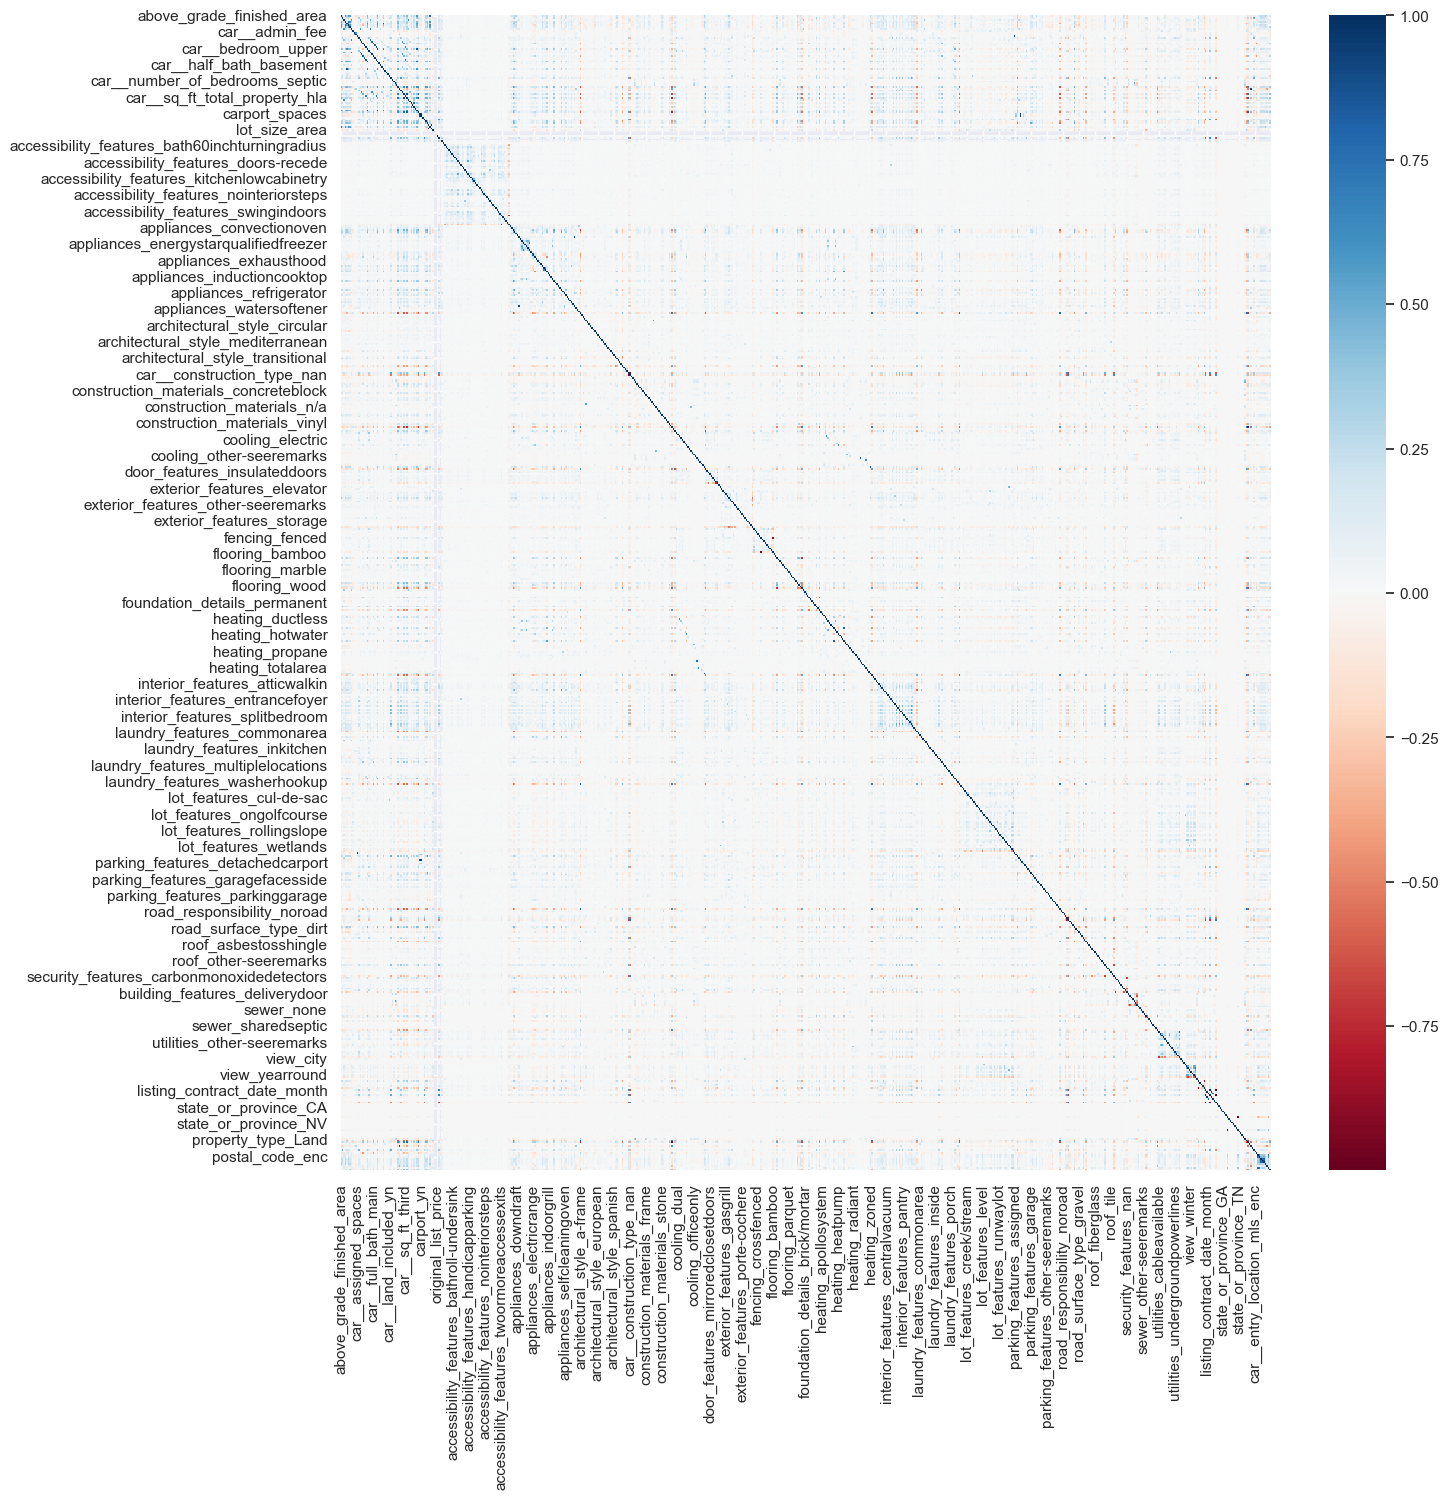

In [72]:
rm_cols = high_correlated_cols(dc.dataframe, plot=True, corr_th=0.7)

In [73]:
for i in rm_cols:
    print(i)
print(len(rm_cols))

bathrooms_total_integer
car__full_bath_basement
car__full_bath_lower
car__full_bath_main
car__full_bath_second_lq
car__full_bath_third
car__full_bath_upper
car__half_bath_main
car__sq_ft_third
car__sq_ft_total_property_hla
car__sq_ft_unheated_total
car__sq_ft_upper
car_ratio__current_price__by__total_property_hla
carport_yn
living_area
longitude
accessibility_features_nan
appliances_electricrange
appliances_gasrange
appliances_washer
car__construction_type_nan
construction_materials_nan
door_features_nan
fencing_nan
flooring_nan
heating_naturalgas
heating_separatemeters
heating_zoned
heating_nan
laundry_features_nan
parking_features_assigned
parking_features_carport
parking_features_nan
road_responsibility_nan
security_features_nan
utilities_nan
window_features_nan
original_entry_timestamp_year
original_entry_timestamp_month
original_entry_timestamp_day
months_till_today
state_or_province_SC
property_type_Land
property_type_Residential
property_type_Residential Lease
postal_code_enc
hi

In [74]:
dc.drop_cols(cols=rm_cols)

In [75]:
dc.dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533214 entries, 0 to 2533213
Columns: 590 entries, above_grade_finished_area to property_sub_type_enc
dtypes: bool(533), float32(18), float64(30), int32(6), int64(3)
memory usage: 2.1 GB


### _It is apparent that target feature doesn't follow normal distribution, so before performing regression it has to be transformed. While log transformation does pretty good job, best fit is unbounded Johnson distribution._

In [ ]:
normal = dc.dataframe.apply(lambda x: stats.shapiro(x).pvalue < 0.05)
# print(normal)
# print(not normal.any())
print(not normal.any())

In [ ]:
v.three_chart_plot(dc.dataframe, "original_list_price")

In [ ]:
v.plot_pca(df=dc.dataframe, n_comp=300, k_cluster=20, plot=True)

In [76]:
for feature in dc.dataframe.columns:
    print(feature)

above_grade_finished_area
association_yn
basement_yn
bathrooms_full
bathrooms_half
bedrooms_total
below_grade_finished_area
car__acres_cleared
car__admin_fee
car__application_fee
car__assigned_spaces
car__association_annual_expense
car__bedroom_basement
car__bedroom_lower
car__bedroom_main
car__bedroom_second_lq
car__bedroom_third
car__bedroom_upper
car__down_payment_resource_yn
car__green_verification_count
car__half_bath_basement
car__half_bath_lower
car__half_bath_second_lq
car__half_bath_third
car__half_bath_upper
car__land_included_yn
car__main_level_garage_yn
car__number_of_bays
car__number_of_bedrooms_septic
car__number_of_docks_total
car__number_of_drive_in_doors_total
car__room_count
car__security_deposit
car__sq_ft_garage
car__sq_ft_lower
car__sq_ft_main
car__sq_ft_unheated_basement
car__sq_ft_unheated_lower
car__sq_ft_unheated_main
car__sq_ft_unheated_third
car__sq_ft_unheated_upper
carport_spaces
covered_spaces
documents_count
fireplace_yn
garage_yn
latitude
list_price
lot_

In [77]:
dc.dataframe = dc.dataframe.reindex(sorted(dc.dataframe.columns), axis=1)
X = dc.dataframe.drop(columns=dc.y).reset_index(drop=True)
y = dc.dataframe[dc.y]

In [79]:
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt
import pandas as pd

ranks = fisher_score.fisher_score(X.values, y.values)
feat_imp = pd.Series(ranks, dc.dataframe.columns[0: len(dc.dataframe.columns)-1])
feat_imp.plot(kind="barh", color="teal")
plt.show()

: 

## Training with different models

In [ ]:
from datetime import datetime
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import (
    cross_val_score,
    train_test_split,
    RepeatedKFold,
    KFold,
)
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

rand_state = 100
kfolds = KFold(n_splits=20, shuffle=True, random_state=rand_state)
# kfolds = RepeatedKFold(n_splits=20, n_repeats=5, random_state=rand_state)
# dc.dataframe = dc.dataframe.reindex(sorted(dc.dataframe.columns), axis=1)
# X = dc.dataframe.drop(columns=dc.y).reset_index(drop=True)
# y = dc.dataframe[dc.y]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=rand_state
)


# rmsle
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y), np.expm1(y_pred)))


# build our model scoring function
def cv_rmse(model, X=X_train, y=y_train):
    rmse = np.sqrt(
        -cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds)
    )
    return rmse


# setup models
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
max_iter = int(1e7)

ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))

lasso = make_pipeline(
    RobustScaler(),
    LassoCV(max_iter=max_iter, alphas=alphas2, random_state=rand_state, cv=kfolds),
)

elasticnet = make_pipeline(
    RobustScaler(),
    ElasticNetCV(max_iter=max_iter, alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio),
)

svr = make_pipeline(
    RobustScaler(),
    SVR(
        C=20,
        epsilon=0.008,
        gamma=0.0003,
    ),
)


gbr = GradientBoostingRegressor(
    n_estimators=3000,
    learning_rate=0.05,
    max_depth=4,
    max_features="sqrt",
    min_samples_leaf=15,
    min_samples_split=10,
    loss="huber",
    random_state=rand_state,
    # objective="reg:squarederror",
)


lightgbm = LGBMRegressor(
    objective="regression",
    num_leaves=4,
    learning_rate=0.01,
    n_estimators=5000,
    max_bin=200,
    bagging_fraction=0.75,
    bagging_freq=5,
    bagging_seed=7,
    feature_fraction=0.2,
    feature_fraction_seed=7,
    verbose=-1,
    # min_data_in_leaf=2,
    # min_sum_hessian_in_leaf=11
)


xgboost = XGBRegressor(
    learning_rate=0.01,
    n_estimators=3460,
    max_depth=3,
    min_child_weight=0,
    gamma=0,
    subsample=0.7,
    colsample_bytree=0.7,
    # objective="reg:linear",
    objective="reg:squarederror",
    nthread=-1,
    scale_pos_weight=1,
    seed=27,
    reg_alpha=0.00006,
)

# stack
stack_gen = StackingCVRegressor(
    regressors=(ridge, lasso, elasticnet, gbr, xgboost, lightgbm),
    meta_regressor=xgboost,
    use_features_in_secondary=True,
)


print("TEST score on CV")
score_ridge = cv_rmse(ridge)
print(
    "Kernel Ridge score: {:.4f} ({:.4f})\n".format(
        score_ridge.mean(), score_ridge.std()
    ),
    datetime.now(),
)

score_lasso = cv_rmse(lasso)
print(
    "Lasso score: {:.4f} ({:.4f})\n".format(score_lasso.mean(), score_lasso.std()),
    datetime.now(),
)

score_elast = cv_rmse(elasticnet)
print(
    "ElasticNet score: {:.4f} ({:.4f})\n".format(score_elast.mean(), score_elast.std()),
    datetime.now(),
)

score_svr = cv_rmse(svr)
print(
    "SVR score: {:.4f} ({:.4f})\n".format(score_svr.mean(), score_svr.std()),
    datetime.now(),
)

score_tgbm = cv_rmse(lightgbm)
print(
    "Lightgbm score: {:.4f} ({:.4f})\n".format(score_tgbm.mean(), score_tgbm.std()),
    datetime.now(),
)

score_gb = cv_rmse(gbr)
print(
    "GradientBoosting score: {:.4f} ({:.4f})\n".format(score_gb.mean(), score_gb.std()),
    datetime.now(),
)

score_xgb = cv_rmse(xgboost)
print(
    "Xgboost score: {:.4f} ({:.4f})\n".format(score_xgb.mean(), score_xgb.std()),
    datetime.now(),
)

In [ ]:
print("START Fit")
print(datetime.now(), "StackingCVRegressor")
stack_gen_model = stack_gen.fit(np.array(X_train), np.array(y_train))
print(datetime.now(), "ElasticNet")
elastic_model_full_data = elasticnet.fit(X_train, y_train)
print(datetime.now(), "Lasso")
lasso_model_full_data = lasso.fit(X_train, y_train)
print(datetime.now(), "Ridge")
ridge_model_full_data = ridge.fit(X_train, y_train)
print(datetime.now(), "SVR")
svr_model_full_data = svr.fit(X_train, y_train)
print(datetime.now(), "GradientBoosting")
gbr_model_full_data = gbr.fit(X_train, y_train)
print(datetime.now(), "XGBoost")
xgb_model_full_data = xgboost.fit(X_train, y_train)
print(datetime.now(), "LighTgbm")
lgb_model_full_data = lightgbm.fit(X_train, y_train)

### Stack models

In [ ]:
scores = []
scores.extend(
    [
        round(score_ridge.mean(), 2),
        round(score_lasso.mean(), 2),
        round(score_elast.mean(), 2),
        round(score_svr.mean(), 2),
        round(score_tgbm.mean(), 2),
        round(score_gb.mean(), 2),
        round(score_xgb.mean(), 2),
    ]
)
total = sum(scores)
weights = [round(val / total, 2) for val in scores]
print(weights)

In [ ]:
def blend_models_predict(X):
    return (
        (0.04 * elastic_model_full_data.predict(X_test))
        + (0.04 * lasso_model_full_data.predict(X_test))
        + (0.04 * ridge_model_full_data.predict(X_test))
        + (0.04 * svr_model_full_data.predict(X_test))
        + (0.13 * gbr_model_full_data.predict(X_test))
        + (0.23 * xgb_model_full_data.predict(X_test))
        + (0.13 * lgb_model_full_data.predict(X_test))
        + (0.35 * stack_gen_model.predict(np.array(X_test)))
    )

y_pred = blend_models_predict(X_test)
print("RMSLE score on test data:")
print(rmsle(y_test, blend_models_predict(X_test)))

In [ ]:
y_test.iloc[0], y_test.iloc[1]

In [ ]:
print(np.expm1(y_test.iloc[0:10]), np.expm1(y_test.iloc[1]))

In [ ]:
print(np.expm1(blend_models_predict(X_test))[0], np.expm1(y_pred)[1])

In [ ]:
print(np.expm1(y_pred)[0:10])

In [ ]:
print(np.expm1(y_test.iloc[0:10]))

## Save Models

In [ ]:
import pickle

# save models as a pickle file
models = {
    "stack_gen_model.pkl": stack_gen_model,
    "elastic_model.pkl": elastic_model_full_data,
    "lasso_model.pkl": lasso_model_full_data,
    "ridge_model.pkl": ridge_model_full_data,
    "svr_model.pkl": svr_model_full_data,
    "gbr_model.pkl": gbr_model_full_data,
    "xgb_model.pkl": xgb_model_full_data,
    "lgb_model.pkl": lgb_model_full_data,
}

for key, val in models.items():
    with open(os.path.join("app/saved-models/", key), "wb") as file:
        pickle.dump(val, file)

# load model from pickle file
# with open(model_pkl_file, "rb") as file:
#     model = pickle.load(file)

In [ ]:
import joblib

# save models as a pickle file
models = {
    "stack_gen_model.sav": stack_gen_model,
    "elastic_model.sav": elastic_model_full_data,
    "lasso_model.sav": lasso_model_full_data,
    "ridge_model.sav": ridge_model_full_data,
    "svr_model.sav": svr_model_full_data,
    "gbr_model.sav": gbr_model_full_data,
    "xgb_model.sav": xgb_model_full_data,
    "lgb_model.sav": lgb_model_full_data,
}

for key, val in models.items():
    with open(os.path.join("app/saved-models/", key), "wb") as file:
        joblib.dump(val, file)

# load model with joblib
# loaded_model = joblib.load("app/saved-models/xgb_model.sav")

### get feature importance

In [ ]:
xgboost.feature_importances_.argsort()

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# plot feature importance
plot_importance(xgboost, max_num_features=100, )
plt.show()

In [ ]:
# load model with joblib
loaded_model = joblib.load("app/saved-models/xgb_model.sav")
loaded_model.get_booster().get_score(importance_type="weight")

In [ ]:
# v.bar_chart(dc.dataframe, cols=["tax_assessed_value"])

In [ ]:
v.scatter_y_and_yhat(y_test, y_pred)